In [55]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

Let's have a look at the DataFrames

In [8]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [9]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


Let's also grab some basic info about them

In [15]:
city_df.info()
city_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
None


,driver_count
count,120.000000
mean,24.775000
std,20.277678
min,1.000000
25%,7.000000
50%,20.500000
75%,38.250000
max,73.000000


In [16]:
ride_df.info()
ride_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB
None


,fare,ride_id
count,2375.000000,2.375000e+03
mean,26.753112,4.887270e+12
std,12.109465,2.907361e+12
min,4.050000,3.218337e+08
25%,17.190000,2.381175e+12
50%,26.600000,4.748541e+12
75%,36.645000,7.461936e+12
max,58.550000,9.991538e+12


We have a couple pretty clean datasets here. No null entries to speak of. Low column count too so this will make it a pretty simple join.

In [59]:
city_df["city"].value_counts().index

Index(['Deanville', 'Lake Scott', 'Loganberg', 'North Jeffrey', 'Amandaburgh',
       'South Jennifer', 'Port Johnbury', 'East Kentstad', 'Johnton',
       'Huntermouth',
       ...
       'Nicolechester', 'West Samuelburgh', 'Bethanyland', 'Newtonview',
       'Justinberg', 'Lake Latoyabury', 'Martinezhaven', 'New Paulton',
       'Karenberg', 'Roberthaven'],
      dtype='object', length=120)

In [60]:
ride_df["city"].value_counts().index

Index(['West Angela', 'South Karenland', 'North Jason', 'Liumouth',
       'Port Frank', 'South Phillip', 'South Evanton', 'West Robert',
       'South Michelleport', 'Justinberg',
       ...
       'Taylorhaven', 'New Ryantown', 'Harringtonfort', 'Jessicaport',
       'Lake Jamie', 'Randallchester', 'Penaborough', 'South Saramouth',
       'Newtonview', 'Garzaport'],
      dtype='object', length=120)

Same city count too. But are the list of cities themselves the same between the two DataFrames?

In [29]:
city_df_cities = list(city_df["city"].value_counts().index)
ride_df_cities = list(ride_df["city"].value_counts().index)

def missing_cities(left, right):
    missing_cities_count = 0
    
    for city in left:
        if city not in right:
            missing_cities_count += 1
    
    return missing_cities_count

city_only = missing_cities(city_df_cities, ride_df_cities)
ride_only = missing_cities(ride_df_cities, city_df_cities)
print(f"Cities in city_df only: {city_only}")
print(f"Cities in ride_df only: {ride_only}")

Cities in city_df only: 0
Cities in ride_df only: 0


Ok, we're totally safe then. There are no cities that are in one DataFrame, but not the other.

In [212]:
# Combine the data into a single dataset
city_rides_df = pd.merge(ride_df,city_df,how="inner",on="city")

# Display the data table for preview
city_rides_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


What are all the city types?

In [42]:
city_rides_df["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

In [256]:
# Obtain the x and y coordinates for each of the three city types
city_grp_df = city_rides_df.groupby("city").agg({"ride_id":"count", "fare":"mean", "type": lambda x: x.unique(), "driver_count":lambda x: x.unique()})
city_grp_df.rename(columns={"ride_id":"Total_Rides","fare":"Average_Fare","type":"City_Type","driver_count":"Driver_Count"}, inplace=True)
city_grp_df.head()

,Total_Rides,Average_Fare,City_Type,Driver_Count
city,,,,
Amandaburgh,18,24.641667,Urban,12
Barajasview,22,25.332273,Urban,26
Barronchester,16,36.422500,Suburban,11
Bethanyland,18,32.956111,Suburban,22
Bradshawfurt,10,40.064000,Rural,7


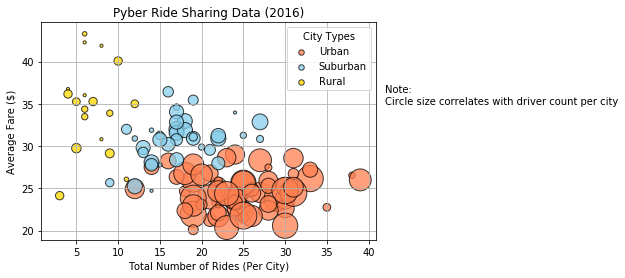

In [261]:
##### Build the scatter plots for each city types
city_types = ["Urban", "Suburban", "Rural"]
colors = {'Urban':'coral', 'Suburban':'skyblue', 'Rural':'gold'}
# bubble_plot = city_grp_df.plot(kind="scatter", x="Total_Rides", y="Average_Fare", s=city_grp_df["Driver_Count"],
#                                edgecolor="black", alpha= 0.75, c=city_grp_df['City_Type'].apply(lambda x: colors[x]),
#                                label = city_grp_df["City_Type"]
#                               );

fig, ax = plt.subplots()
for city in city_types:
    # increased size s 10x for visibility
    ax.scatter(
               x=city_grp_df[city_grp_df["City_Type"]==city]["Total_Rides"],
               y=city_grp_df[city_grp_df["City_Type"]==city]["Average_Fare"],
               s = city_grp_df[city_grp_df["City_Type"]==city]["Driver_Count"]*10,
               c = colors[city],
               edgecolor="black",
               label = city,
               alpha = 0.75
              )

# Incorporate the other graph properties
ax.grid()
ax.set_title("Pyber Ride Sharing Data (2016)")
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")

# Create a legend
legend = ax.legend(title = "City Types")

# Fix size of legend markers to be same size
for i in range(len(legend.legendHandles)):
    legend.legendHandles[i]._sizes = [30]

# Incorporate a text label regarding circle size
ax.text(42,35,"Note:\nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("images/pyber.png")

## Total Fares by City Type

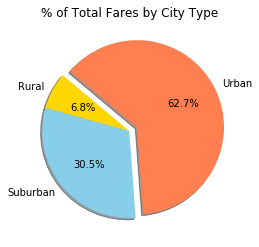

In [204]:
# Calculate Type Percents
colors = {'Urban':'coral', 'Suburban':'skyblue', 'Rural':'gold'}
tot_fares_by_city_type = city_rides_df.groupby("type").agg({"fare":"sum"})

# Build Pie Chart
fig = tot_fares_by_city_type.plot(kind="pie", y="fare", autopct="%1.1f%%", legend=False, explode = [0,0,.1],
                                  colors = ['gold', 'skyblue', 'coral'], shadow=True, startangle=140);
fig.set_ylabel("");
fig.set_title("% of Total Fares by City Type");

# Save Figure
plt.savefig("images/total_fares_by_city_type.png")

## Total Rides by City Type

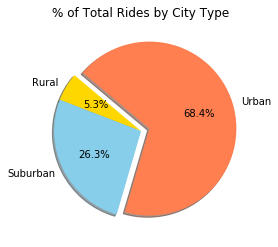

In [208]:
# Calculate Ride Percents
colors = {'Urban':'coral', 'Suburban':'skyblue', 'Rural':'gold'}
tot_fares_by_city_type = city_rides_df.groupby("type").agg({"ride_id":"count"})

# Build Pie Chart
fig = tot_fares_by_city_type.plot(kind="pie", y="ride_id", autopct="%1.1f%%", legend=False, explode = [0,0,.1],
                                  colors = ['gold', 'skyblue', 'coral'], shadow=True, startangle=140);
fig.set_ylabel("");
fig.set_title("% of Total Rides by City Type");

# Save Figure
plt.savefig("images/total_rides_by_city_type.png")

## Total Drivers by City Type

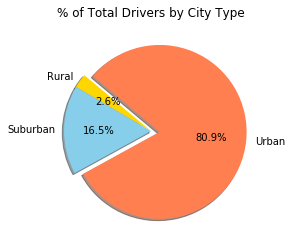

In [260]:
# Calculate Driver Percents
# use city_grp_df since it has corrected Driver Count
colors = {'Urban':'coral', 'Suburban':'skyblue', 'Rural':'gold'}
tot_fares_by_city_type = city_grp_df.groupby("City_Type").agg({"Driver_Count":"sum"}) 

# Build Pie Chart
fig = tot_fares_by_city_type.plot(kind="pie", y="Driver_Count", autopct="%1.1f%%", legend=False, explode = [0,0,.1],
                                  colors = ['gold', 'skyblue', 'coral'], shadow=True, startangle=140);
fig.set_ylabel("");
fig.set_title("% of Total Drivers by City Type");

# Save Figure
plt.savefig("images/total_drivers_by_city_type.png")